In [1]:
###경사 하강법: 손실 함수의 값을 최소화 하는 최적화 알고리즘

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
# test data
num_points = 1000

x_data = np.random.normal(0.0, 0.55, (1000))
y_data = x_data*0.1 + 0.3 + np.random.normal(0.0, 0.03, (1000))

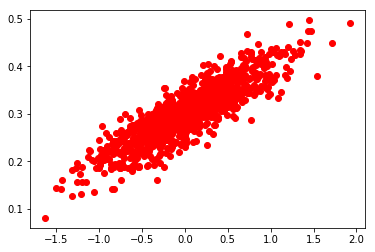

In [6]:
plt.plot(x_data, y_data, 'ro')
plt.show()

In [14]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0)) #가중치
b = tf.Variable(tf.zeros([1])) #바이어스

#y= W*x_data + b
y = tf.add(tf.matmul(W,x_data), b, name = 'model')

loss = tf.reduce_mean(tf.square(y-y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5) #학습률
train = optimizer.minimize(loss)

# 세션 초기화
init= tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

0 [0.58576334] [0.005764] 0.14819373


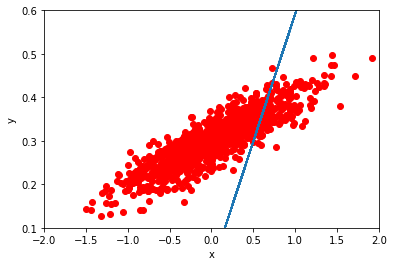

1 [0.5831197] [0.01141402] 0.14433576


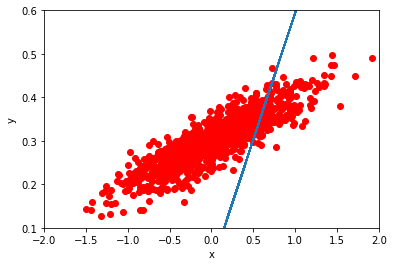

2 [0.58048844] [0.01695231] 0.14060813


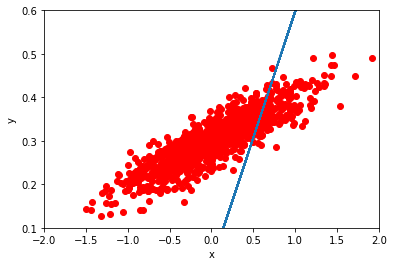

3 [0.57786965] [0.0223811] 0.13700584


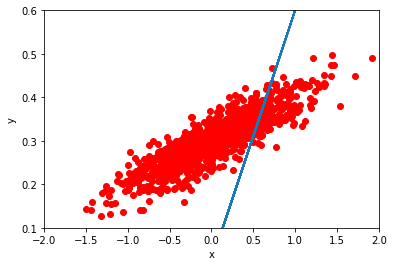

4 [0.57526326] [0.0277026] 0.13352428


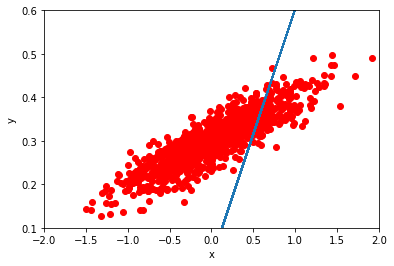

5 [0.57266927] [0.03291892] 0.13015887


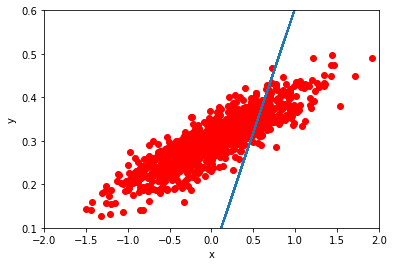

6 [0.5700876] [0.03803217] 0.12690528


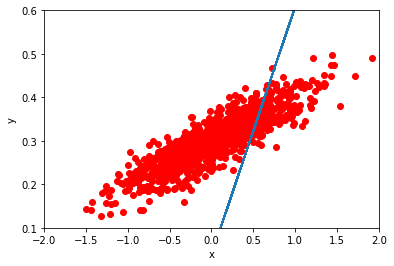

7 [0.5675183] [0.04304441] 0.12375927


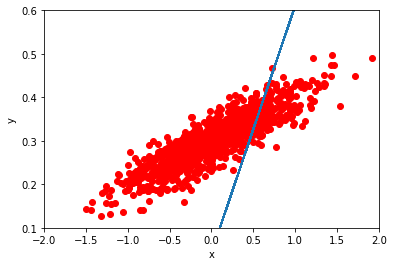

In [15]:
#학습
for step in range(8):
    sess.run(train)
    print(step, sess.run(W), sess.run(b), sess.run(loss))
    
    #산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    #직선 그리기
    plt.plot(x_data, sess.run(W)*x_data + sess.run(b))
    #레이블링 및 각 축 최대, 최소값 범위지정
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()

0 [0.07234596] [0.3009647] [0.3009647]


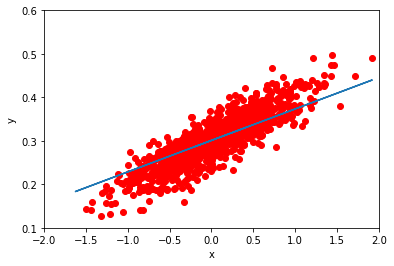

1 [0.08034298] [0.3006935] [0.3006935]


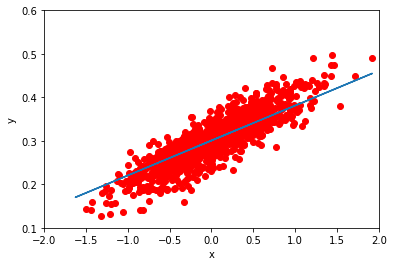

2 [0.08605181] [0.30049992] [0.30049992]


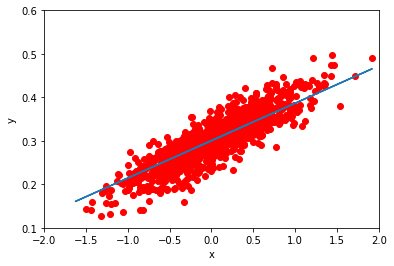

3 [0.09012716] [0.30036172] [0.30036172]


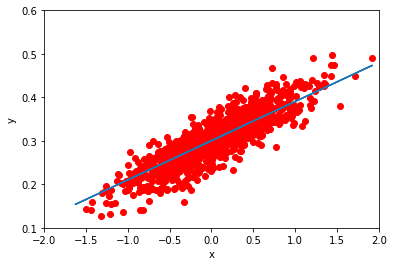

4 [0.09303643] [0.30026308] [0.30026308]


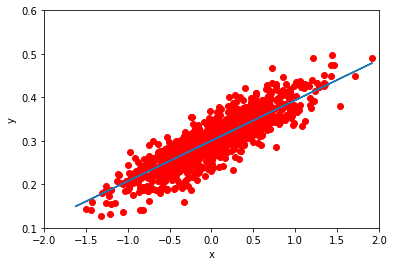

5 [0.09511326] [0.30019265] [0.30019265]


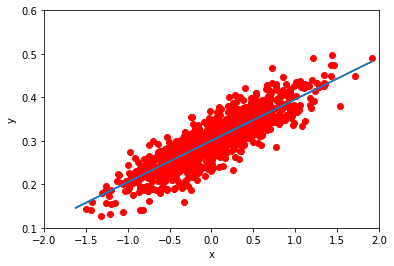

6 [0.09659585] [0.30014238] [0.30014238]


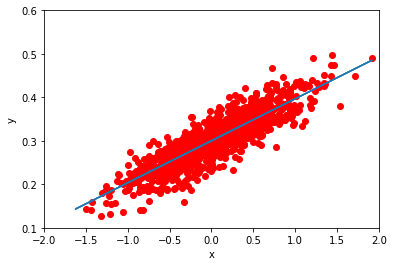

7 [0.09765423] [0.30010647] [0.30010647]


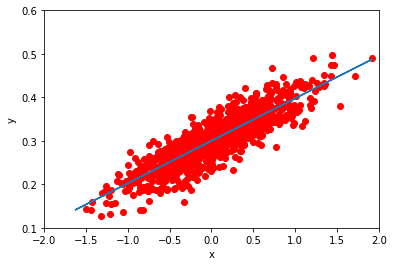

In [13]:
#fetches 이용 학습
for step in range(8):
    _, val_W, val_b, val_loss = sess.run([train, W, b, loss])
    print(step,val_W, val_b, val_b)
    
    #산포도 그리기
    plt.plot(x_data, y_data, 'ro')
    #직선 그리기
    plt.plot(x_data,val_W*x_data + val_b)
    #레이블링 및 각 축 최대, 최소값 범위지정
    plt.xlabel('x')
    plt.xlim(-2,2)
    plt.ylim(0.1, 0.6)
    plt.ylabel('y')
    plt.show()

In [16]:
### 다중 회귀 분석
import numpy as np
import tensorflow as tf

In [17]:
#데이터를 생성하고 결과 시뮬레이션
x_data = np.random.randn(2000,3)
w_real = [0.3, 0.5, 0.1]
b_real = -0.2

noise = np.random.randn(1,2000) * 0.1
y_data = np.matmul(w_real, x_data.T) + b_real + noise

print(x_data.shape, y_data.shape)

(2000, 3) (1, 2000)


In [19]:
wb_ = []
x = tf.placeholder(tf.float32, shape = [None, 3])
y_true = tf.placeholder(tf.float32, shape=None)

w = tf.Variable([[0,0,0]], dtype=tf.float32)
b = tf.Variable(0, dtype=tf.float32)
y_pred = tf.matmul(w, tf.transpose(x)) + b

loss = tf.reduce_mean(tf.square(y_true-y_pred))

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

Instructions for updating:
Use tf.cast instead.


In [21]:
NUM_STEPS = 10

init = tf.global_variables_initializer()
with tf.Session() as sess :
    sess.run(init)
    for step in range(NUM_STEPS):
        sess.run(train, {x: x_data, y_true: y_data})
        if(step%5 == 0):
            print(step, sess.run([w,b]))
            wb_.append(sess.run([w,b]))
            
    print(10, sess.run([w,b]))

0 [array([[0.3180324 , 0.48667663, 0.08751663]], dtype=float32), -0.18696564]
5 [array([[0.3020939 , 0.498726  , 0.09785125]], dtype=float32), -0.20166373]
10 [array([[0.3020939 , 0.498726  , 0.09785125]], dtype=float32), -0.20166373]
